## ***Spam Email Detection - ML models are trained on labeled datasets to classify emails as spam or non-spam. Features like word frequencies and sender information are used for classification, and the model is regularly updated to adapt to evolving spamming techniques!!***

Step 1: Importing all necessary libraries for our Project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

Step 2: Now we have to load the Dataset into the Notebook

In [ ]:
df = pd.read_csv('mail_data.csv',encoding='ISO-8859-1')
df.head(10)

In [ ]:
data = df.where((pd.notnull(df)), ' ')
data.info()

Step 3: Cleaning the Data and renaming the unlabelled data with "Target" and "Text"

In [ ]:
#For cleaning the Data
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

In [ ]:
#For renaming the Data
df.rename(columns= {'v1':'Target', 'v2':'Text'}, inplace=True)
df.sample(5)

Step 4: Encoding the Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['Target'] = encoder.fit_transform(df['Target'])
df.sample(5)

Step 5: Rechecking and Correcting missing Values

In [ ]:
#For  missing values
df.isnull().sum()

In [ ]:
#For identifying duplicate values
df.duplicated().sum()

In [ ]:
#For removing duplicate values
df = df.drop_duplicates(keep="first")
df.duplicated().sum()

In [ ]:
df.shape

In [ ]:
df.head()

Step 6: Graphical Representation of Dataset

In [ ]:
df['Target'].value_counts()

In [ ]:
plt.pie(df['Target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

Step 7: Downloading NLP Toolkit and importing library

In [ ]:
import nltk
nltk.download("punkt")

Step 8: Summarising the Text

In [ ]:
#Total number of characters
df['Character_Count'] = df['Text'].apply(len)
df.head()

In [ ]:
#Total number of words
df['Words_Count'] =  df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

In [ ]:
#Total number of sentences
df['Sentences_Count'] =  df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

In [ ]:
df[['Character_Count', 'Words_Count', 'Sentences_Count']].describe()

,Character_Count,Words_Count,Sentences_Count
count,5572.000000,5572.000000,5572.000000
mean,80.337940,18.699390,1.996411
std,59.790057,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,122.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


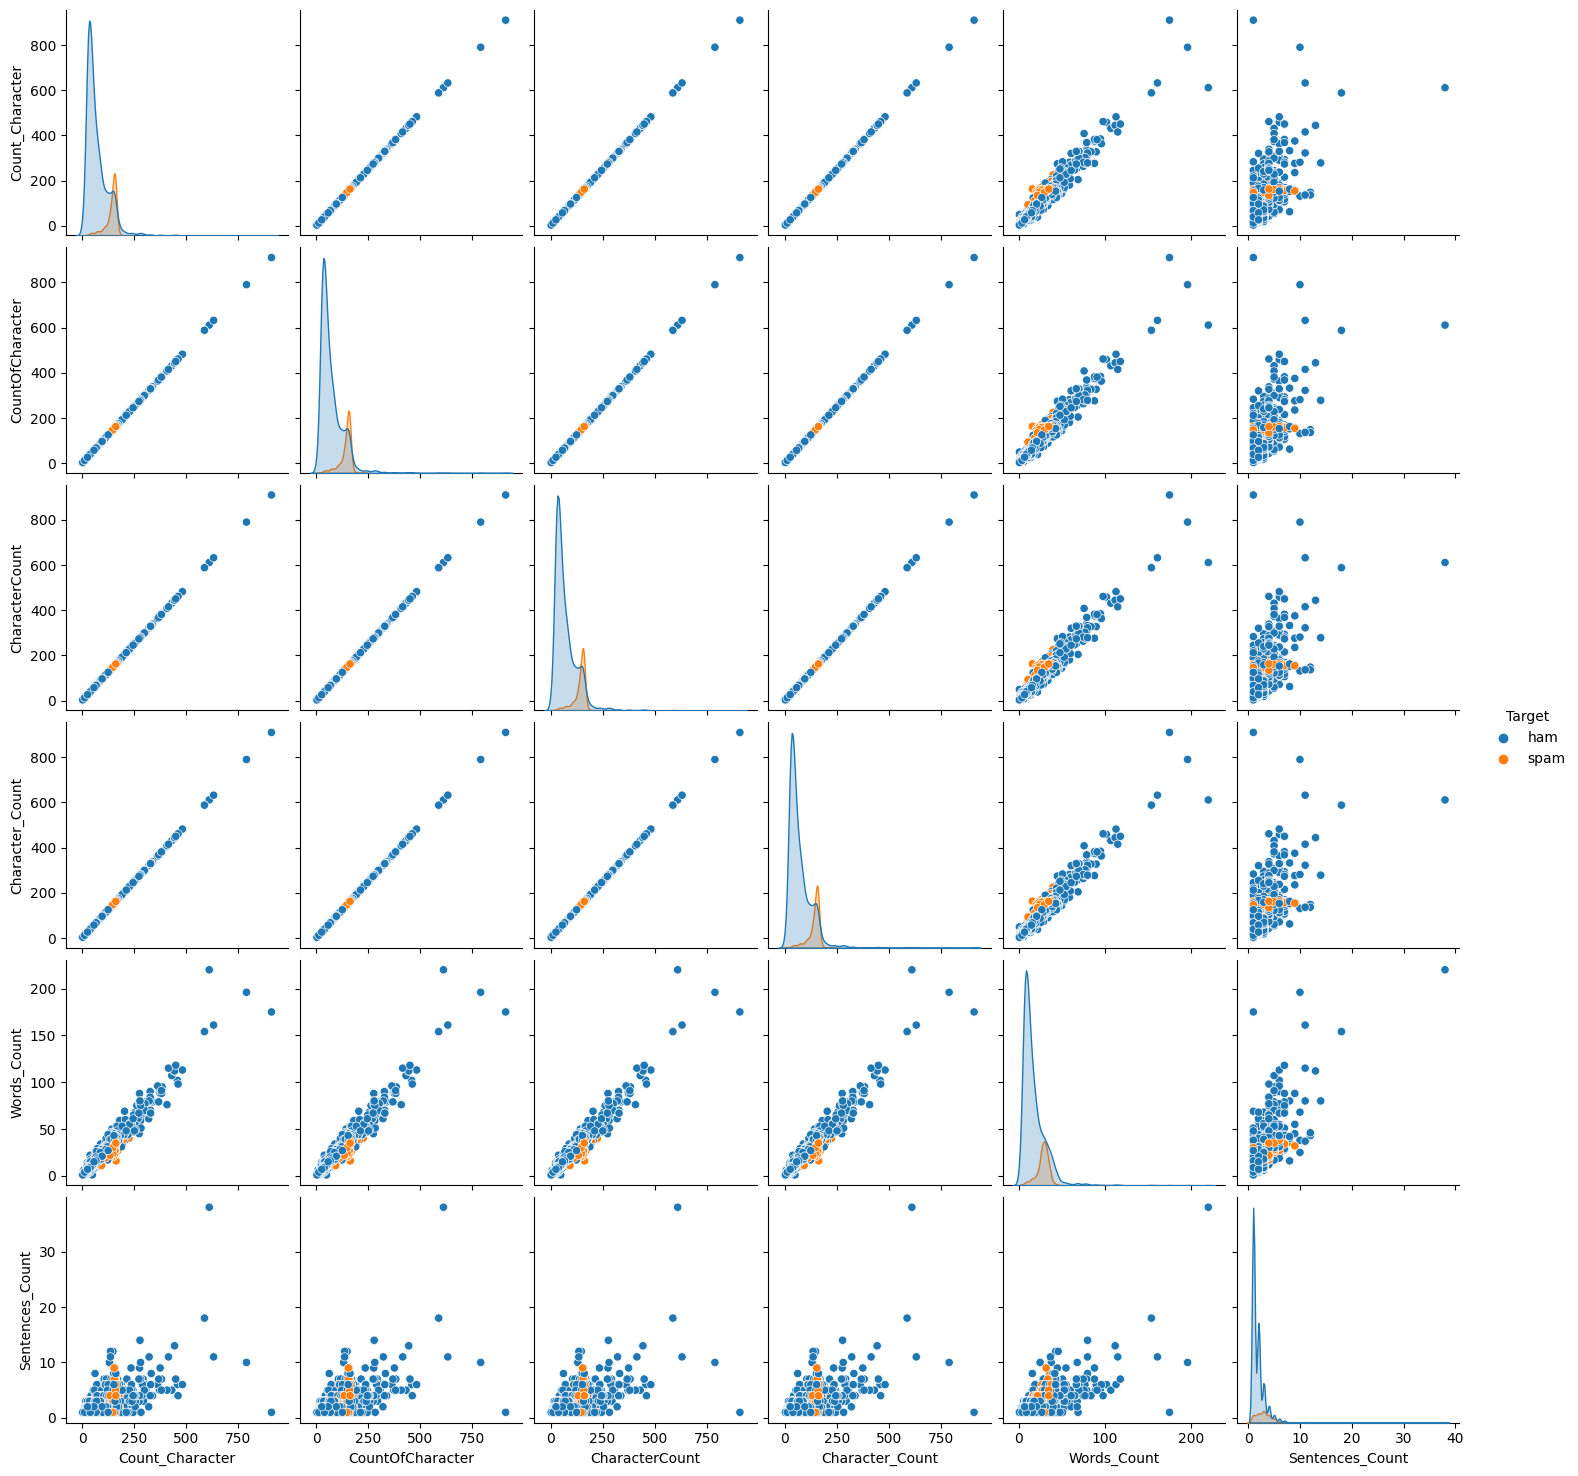

In [ ]:
sns.pairplot(df, hue='Target')

#**Data Preproccesing**#

*   Lower Case
*   Tokenising
*   Removing Special characters
*   Removing stop words and punctuation
*   Stemming








In [ ]:
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def trans_text(Text):
    Text = Text.lower()
    Text = nltk.word_tokenize(Text)

    y = []
    for i in Text:
        if i.isalnum():
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
        if i not in string.punctuation:
            y.append(i)

    Text = y[:]
    y.clear()

    for i in Text:
          y.append(ps.stem(i))

    return " ".join(y)

In [ ]:
string.punctuation

In [ ]:
df['Transformed_Text'] = df['Text'].apply(trans_text)
df.head()

Step 9: Transformation of Data to Matrix

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df["Transformed_Text"]).toarray()
X

In [ ]:
X.shape

In [ ]:
Y = df["Target"].values
Y

Step 10: Splitting the Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=2, test_size=0.2)

# **MODEL BUILDING**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# **MODEL 1: CONFUSION MATRIX**

In [ ]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred1)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred1))

accuracy_score is: 86.99551569506725
confusion_matrix is:
 [[846 111]
 [ 34 124]]


In [ ]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred2)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred2))

accuracy_score is: 95.87443946188341
confusion_matrix is:
 [[956   1]
 [ 45 113]]


In [ ]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print('accuracy_score is:',accuracy_score(Y_test, Y_pred3)*100)
print('confusion_matrix is:\n',confusion_matrix(Y_test, Y_pred3))

accuracy_score is: 0.9757847533632287
confusion_matrix is:
 [[955   2]
 [ 25 133]]


In [ ]:
results = pd.DataFrame({
    'Model Tests Scores': ['Confusion_Matrix 1','Confusion_Matrix 2','Confusion_Matrix 3'],
    'Score': [86.99,95.87,97.57]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model Tests Scores
Score,
97.57,Confusion_Matrix 3
95.87,Confusion_Matrix 2
86.99,Confusion_Matrix 1


*Hence I can use Confusion Matrix for my algorithm!*